# Explonatory data analysis

## Thesis information
Thesis: Pattern extraction and profiling of historical water network demand patterns

Github: [Private repositorty](https://github.com/Mjnstag/IS-thesis-pattern-extraction)

## Information about used dataset

Due to privacy reasons, a seperate opensource dataset will be used alongside a private dataset. This opensource dataset, called [LeakDB](https://github.com/KIOS-Research/LeakDB) is an artificialy created dataset which closely mimics real world sensor data. While artificial, due to its accuracy it has been chosen to use this dataset for public replications. 

Within the dataset there are 1000 different scenarios of the same graph-like waternetwork structure (see image 1). This EDA will focus on scenario 1.



| ![alt text](img/hanoi_wn.png) | 
|:--:| 
| *Image 1: Hanoi water network (with flow directions and element ids)* |

## Preperations
Loading libraries and the data

In [91]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [92]:
with open("options.txt", 'r') as f:
    options = f.readlines()
    options = {option.split("=")[0]: option.split("=")[1].strip() for option in options}

In [93]:
scenario_dir = options["hanoi_scenario_dir"]

def read_files_dataframe(scenario_dir):
    dfs = []
    for subfolder in ["Demands", "Flows", "Pressures"]:
        for file in Path(scenario_dir).glob(f"{subfolder}/*.csv"):
            dfs.append(pd.read_csv(file, index_col=0, header=0, names=["Index", f"{subfolder}_{file.stem}"]))
    dfs = pd.concat(dfs, axis=1)
    index = pd.read_csv(f'{scenario_dir}/Timestamps.csv', index_col=0, header=0)
    dfs.index = index.Timestamp
    return dfs

df_1 = read_files_dataframe(scenario_dir)
df_1.head()

,Demands_Node_1,Demands_Node_10,Demands_Node_11,Demands_Node_12,Demands_Node_13,Demands_Node_14,Demands_Node_15,Demands_Node_16,Demands_Node_17,Demands_Node_18,...,Pressures_Node_3,Pressures_Node_30,Pressures_Node_31,Pressures_Node_32,Pressures_Node_4,Pressures_Node_5,Pressures_Node_6,Pressures_Node_7,Pressures_Node_8,Pressures_Node_9
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,-3337.2,82.8,82.8,97.2,154.8,90.0,43.2,46.8,154.8,248.4,...,66.305,64.531,64.569,64.655,66.034,65.552,65.268,65.247,65.165,65.136
2017-01-01 00:30:00,-2973.6,61.2,72.0,86.4,140.4,86.4,39.6,43.2,122.4,230.4,...,67.017,65.565,65.600,65.676,66.791,66.386,66.151,66.132,66.071,66.050
2017-01-01 01:00:00,-2584.8,57.6,64.8,75.6,115.2,72.0,32.4,39.6,111.6,180.0,...,67.703,66.554,66.581,66.639,67.528,67.216,67.034,67.020,66.972,66.954
2017-01-01 01:30:00,-2419.2,43.2,57.6,68.4,111.6,61.2,28.8,32.4,115.2,194.4,...,67.962,66.982,67.005,67.055,67.811,67.542,67.384,67.373,67.333,67.319
2017-01-01 02:00:00,-2196.0,43.2,61.2,61.2,97.2,54.0,28.8,28.8,93.6,169.2,...,68.299,67.472,67.492,67.535,68.172,67.944,67.811,67.801,67.766,67.753


In [94]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Data columns (total 98 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Demands_Node_1     17520 non-null  float64
 1   Demands_Node_10    17520 non-null  float64
 2   Demands_Node_11    17520 non-null  float64
 3   Demands_Node_12    17520 non-null  float64
 4   Demands_Node_13    17520 non-null  float64
 5   Demands_Node_14    17520 non-null  float64
 6   Demands_Node_15    17520 non-null  float64
 7   Demands_Node_16    17520 non-null  float64
 8   Demands_Node_17    17520 non-null  float64
 9   Demands_Node_18    17520 non-null  float64
 10  Demands_Node_19    17520 non-null  float64
 11  Demands_Node_2     17520 non-null  float64
 12  Demands_Node_20    17520 non-null  float64
 13  Demands_Node_21    17520 non-null  float64
 14  Demands_Node_22    17520 non-null  float64
 15  Demands_Node_23    17520 non-null  float64


The data is gathered from 32 different nodes and 34 different pipes between the nodes, as can be seen in image 1. The nodes measure the demand and pressure while the pipes measure flow rates. This leads to the dataset having 98 different columns, each with 17520 rows of halfhourly timeseries data. This equates to 1 year of artificial data. 

As can be seen, each of the columns contain floats with no missing values. 

## Overview of multiple nodes

To get a better understanding of how the data looks, we can plot the timeseries as a graph. Due to the different behaviours of the nodes due to their location in the graph, multiple graphs will be shown.

### Nodes of different scenarios

Text(0.5, 0.98, 'Demand at different nodes')

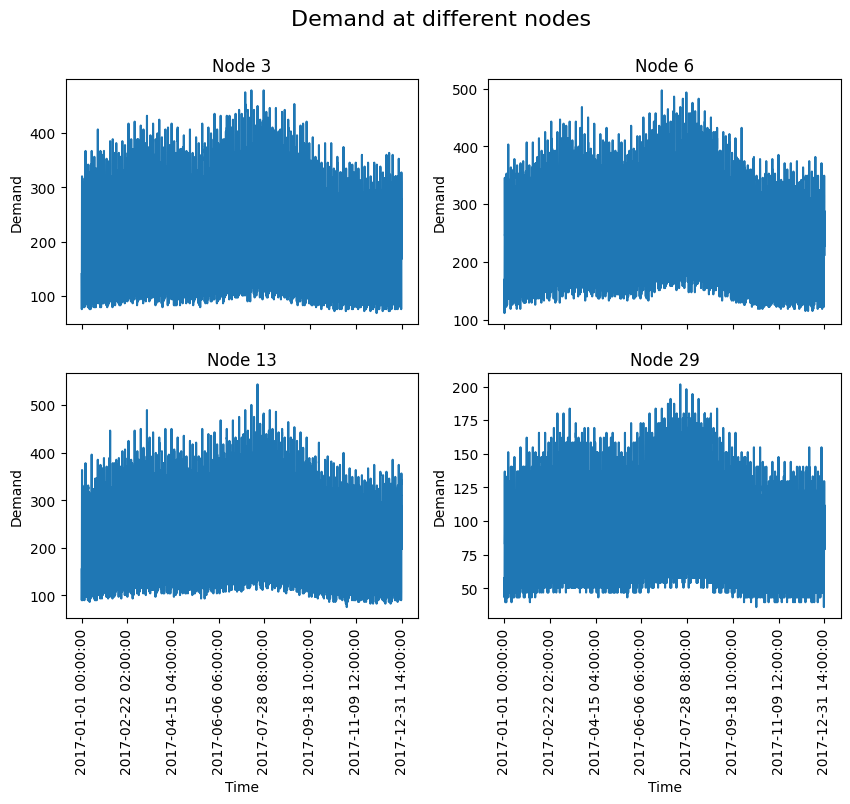

In [95]:
fig, axs = plt.subplots(2, 2, sharex=True)
df_1.Demands_Node_3.plot(ax=axs[0][0], xlabel="Time", ylabel="Demand", title="Node 3", figsize=(10, 7))
df_1.Demands_Node_6.plot(ax=axs[0][1], xlabel="Time", ylabel="Demand", title="Node 6")
df_1.Demands_Node_13.plot(ax=axs[1][0], xlabel="Time", ylabel="Demand", title="Node 13", rot=90)
df_1.Demands_Node_29.plot(ax=axs[1][1], xlabel="Time", ylabel="Demand", title="Node 29", rot=90)
fig.suptitle('Demand at different nodes', fontsize=16)

### Subset of timeseries data
Due to the amount of data, small details are lost so lets plot a month worth of data.

Text(0.5, 0.98, 'Demand at different nodes (subset)')

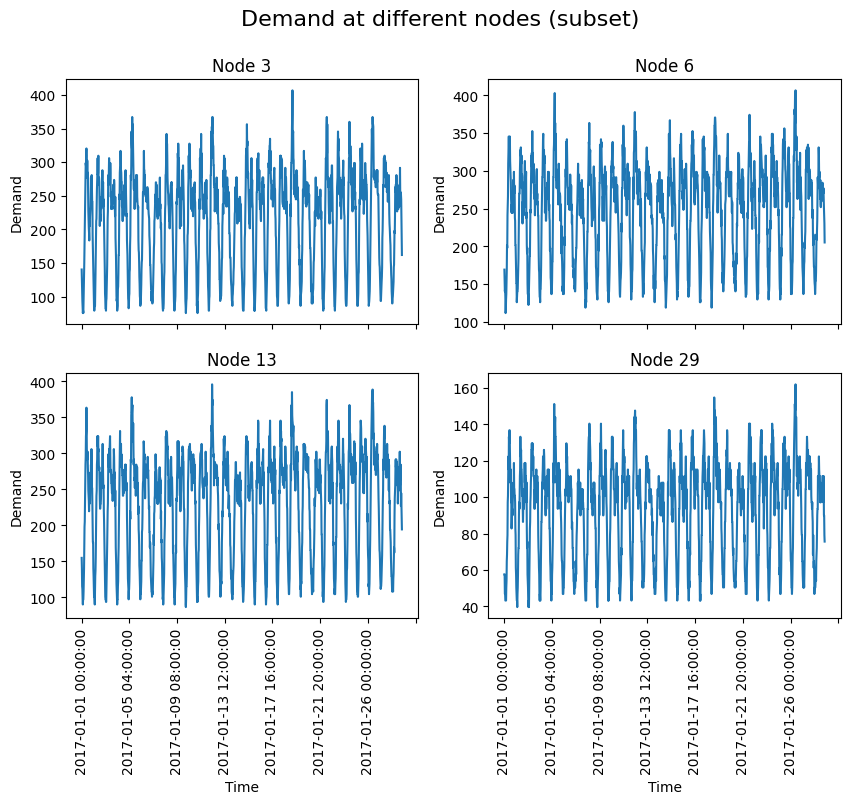

In [96]:
fig, axs = plt.subplots(2,2, sharex=True)
df_1.Demands_Node_3[:1344].plot(ax=axs[0][0], xlabel="Time", ylabel="Demand", title="Node 3", figsize=(10, 7))
df_1.Demands_Node_6[:1344].plot(ax=axs[0][1], xlabel="Time", ylabel="Demand", title="Node 6")
df_1.Demands_Node_13[:1344].plot(ax=axs[1][0], xlabel="Time", ylabel="Demand", title="Node 13", rot=90)
df_1.Demands_Node_29[:1344].plot(ax=axs[1][1], xlabel="Time", ylabel="Demand", title="Node 29", rot=90)
fig.suptitle('Demand at different nodes (subset)', fontsize=16)

The same can be done for pressure at these nodes.

Text(0.5, 0.98, 'Pressure at different nodes')

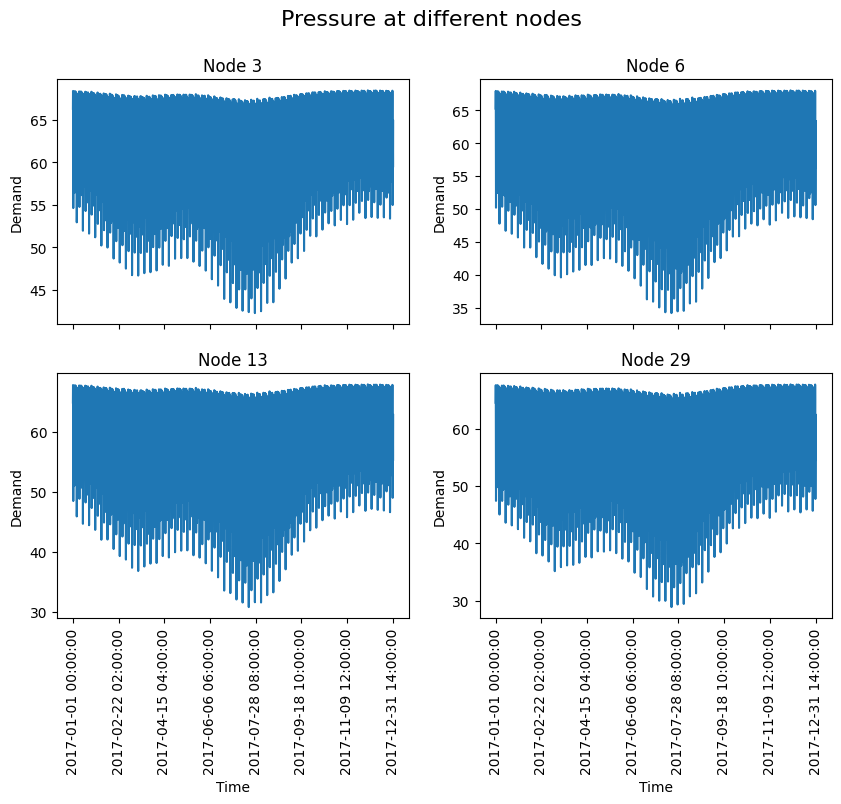

In [97]:
fig, axs = plt.subplots(2, 2, sharex=True)
df_1.Pressures_Node_3.plot(ax=axs[0][0], xlabel="Time", ylabel="Demand", title="Node 3", figsize=(10, 7))
df_1.Pressures_Node_6.plot(ax=axs[0][1], xlabel="Time", ylabel="Demand", title="Node 6")
df_1.Pressures_Node_13.plot(ax=axs[1][0], xlabel="Time", ylabel="Demand", title="Node 13", rot=90)
df_1.Pressures_Node_29.plot(ax=axs[1][1], xlabel="Time", ylabel="Demand", title="Node 29", rot=90)
fig.suptitle('Pressure at different nodes', fontsize=16)

Text(0.5, 0.98, 'Pressure at different nodes')

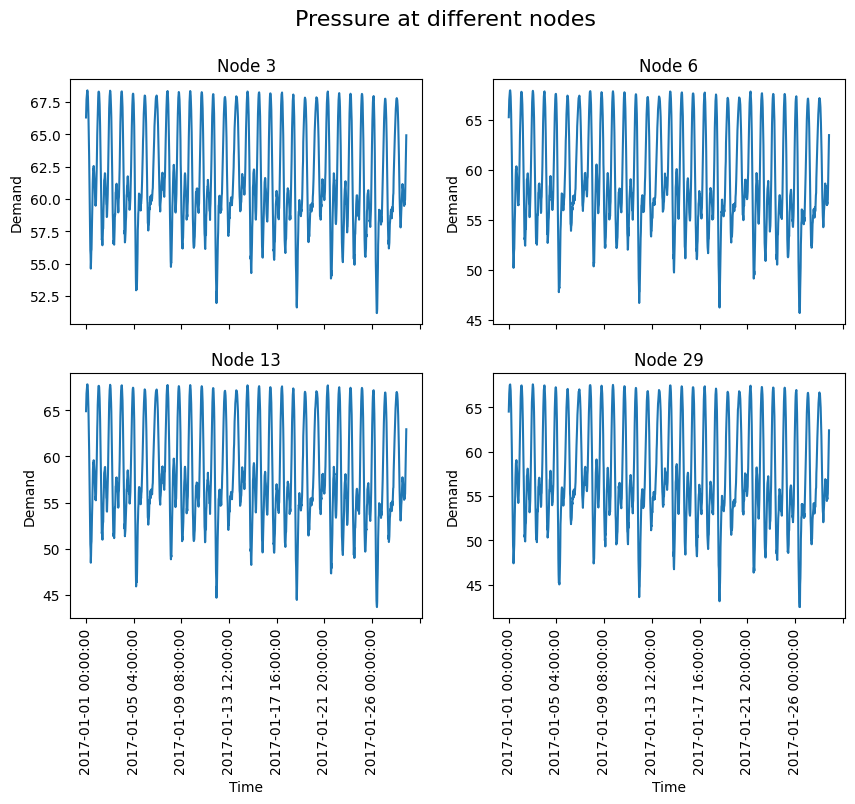

In [98]:
fig, axs = plt.subplots(2, 2, sharex=True)
df_1.Pressures_Node_3[:1344].plot(ax=axs[0][0], xlabel="Time", ylabel="Demand", title="Node 3", figsize=(10, 7))
df_1.Pressures_Node_6[:1344].plot(ax=axs[0][1], xlabel="Time", ylabel="Demand", title="Node 6")
df_1.Pressures_Node_13[:1344].plot(ax=axs[1][0], xlabel="Time", ylabel="Demand", title="Node 13", rot=90)
df_1.Pressures_Node_29[:1344].plot(ax=axs[1][1], xlabel="Time", ylabel="Demand", title="Node 29", rot=90)
fig.suptitle('Pressure at different nodes', fontsize=16)

From these, it is clear that while they mostly look the same, there are some subtle differences. From these plots it also is clear that there seems to be some correlation as well as multiple repeating patterns.

Example of smoothing

<AxesSubplot: >

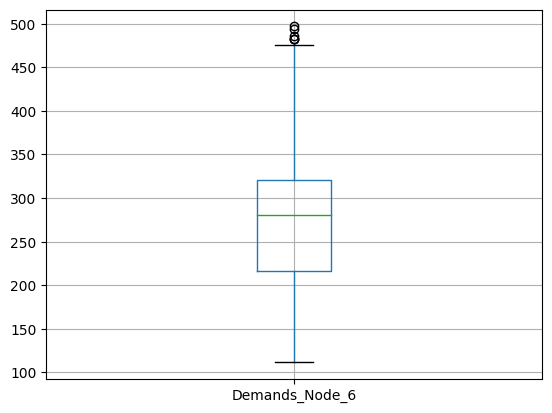

In [99]:
df_1.boxplot(column=['Demands_Node_6'])


In [100]:
df_15.Demands_Node_10.describe()

count    17520.000000
mean       158.158767
std         46.306131
min         54.000000
25%        122.400000
50%        165.600000
75%        190.800000
max        302.400000
Name: Demands_Node_10, dtype: float64

## Correlation

As mentioned earlier, there seems to be some correlation between the different columns. To check if this indeed the case, we can run seaborn's `corr()` function.

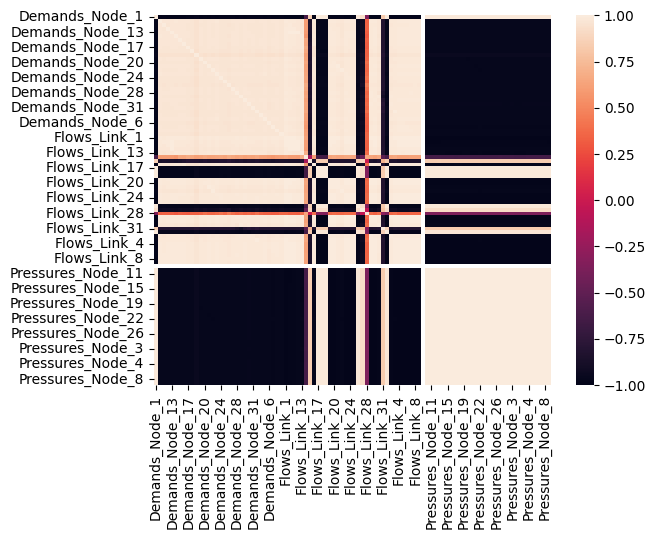

In [101]:
df_1_corr = df_1.corr()
sns.heatmap(df_1_corr, annot=False)
plt.show()

It seems like there are quite a few strongly correlated items, both negativly and positivly correlated. Almost all items seem to have at least some correlation to almost every other time, expect a few, most of which can be found in the middle of the plot. This probably is due to graph-like structure of the data making it so that a change in the network disperses through the graph. 

recorded = only existing values
summary json is actual existing sensor value + interpolated sensor values